# Lead Scoring Case Study

## Problem Statement

X Education is an online education platform catering to industry professionals, attracting a significant number of visitors through various marketing
channels. However, the company is facing a challenge with a low lead conversion rate. On average, only 30 out of every 100 leads convert into customers.

To address this issue, X Education seeks to identify the most promising leads, referred to as "Hot Leads." The company has hired you to develop a model 
that can assign a lead score to each lead, based on multiple factors such as demographics, behavior, preferences, etc. The higher the score, the more 
likely the lead is to convert into a customer. The goal is to ensure the model can help achieve an 80% lead conversion rate.

**Business Objectives:**
1. Build a logistic regression model that assigns a lead score between 0 and 100.
2. The score should reflect the likelihood of a lead converting, with higher scores indicating higher likelihoods of conversion (hot leads), and lower
scores indicating a lower probability (cold leads).
3.  By doing this, X Education aims to increase its lead conversion rate to around 80%, which will improve the efficiency of its sales efforts and ultimately drive more revenue. 
4. The model should be flexible enough to adapt to future changes in the company's requirements, addressing challenges outlined in a separate document. 
You are expected to incorporate these considerations into the final presentation and provide recommendations based on the model's performance.


## Step 1: Reading and Understanding the Data

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required packages
# Importing all neccessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import statsmodels.api as sm

# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
# Importing all datasets
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
lead_df.shape

(9240, 37)

In [8]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step:2 Data cleaning

#### Checking for duplicates:

In [12]:
lead_df[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### Insight:
We can see that there are no duplicate records in our lead dataset.

From above we observe that there are some columns with labels 'Select', which means that the customer didn't select any of the given options, hence it 
is better to treat them as null values.

In [15]:
# Converting 'Select' values to NaN.
lead_df = lead_df.replace('Select', np.nan)

 As we can see that Lead Number and Prospect ID are indicative od ID and these are not important from modelling pointn of view so dropping these two 
columns:

In [17]:
lead_df = lead_df.drop(['Lead Number','Prospect ID'],axis =1)

In [18]:
# Checking the missing values percentage
lead_df.isnull().mean()

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [19]:
round((lead_df.isnull().mean())*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [20]:
#round(lead_df.isnull().mean(),2)*100

In [21]:
# dropping columns with more than 35 % of missing values as it does not make sense to impute these many values. 
cut_off= 35
cols_to_drop = list(lead_df.columns[round(lead_df.isnull().mean(),2)*100>cut_off])
print(cols_to_drop)

['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [22]:
#Dropping the columns having more than 35 % missing values
lead_df= lead_df.drop(cols_to_drop,axis=1)

In [23]:
#round(lead_df.isnull().mean(),2)*100
round((lead_df.isnull().mean())*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Imputing the missing values

#### What matters most to you in choosing a course

In [26]:
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [27]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Unknown')

#### What is your current occupation

In [29]:
lead_df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [30]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unknown')

#### Country

In [32]:
lead_df['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [33]:
lead_df['Country'] = lead_df['Country'].replace(np.nan, 'Unknown')

In [34]:
round((lead_df.isnull().mean())*100,2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [35]:
#now missing values are less than 2% can drop row
## Dropping the rows with null values
#lead_df.dropna(inplace = True)

#### TotalVisits

In [37]:
lead_df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [38]:
lead_df['TotalVisits'] = lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].mode()[0])

#### Page Views Per Visit

In [40]:
lead_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [41]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].mode()[0])

#### Last Activity

In [43]:
lead_df['Last Activity'].value_counts()  

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [44]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')

#### Lead Source

In [46]:
lead_df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [47]:
# Need to replace 'google' with 'Google'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')

In [48]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

In [49]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [50]:
lead_df['Lead Source'].value_counts()

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: count, dtype: int64

#### Last Activity

In [52]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [53]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['View in browser link Clicked', 'Approached upfront'
                                                       'Visited Booth in Tradeshow',  'Resubscribed to emails','Email Received',
                                                             'Email Marked Spam'], 'Other_Activity')
#'Had a Phone Conversation',

In [54]:
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                  3540
SMS Sent                      2745
Olark Chat Conversation        973
Page Visited on Website        640
Converted to Lead              428
Email Bounced                  326
Email Link Clicked             267
Form Submitted on Website      116
Unreachable                     93
Unsubscribed                    61
Had a Phone Conversation        30
Other_Activity                  11
Approached upfront               9
Visited Booth in Tradeshow       1
Name: count, dtype: int64

#### Country

In [56]:
lead_df['Country'] = lead_df['Country'].apply(lambda x: 'india' if x == 'india' 
                                       else ('Unknown' if x == 'Unknown' else 'outside india'))

# Check the value counts
lead_df['Country'].value_counts()

Country
outside india    6779
Unknown          2461
Name: count, dtype: int64

In [57]:
round((lead_df.isnull().mean())*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [58]:
lead_df.shape

(9240, 25)

### Now we can see there are no missing values in dataset

## Step 3: Data Visualtization

In [61]:
# Function for percentage plots
def percent_plot(var):
    values = (lead_df[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

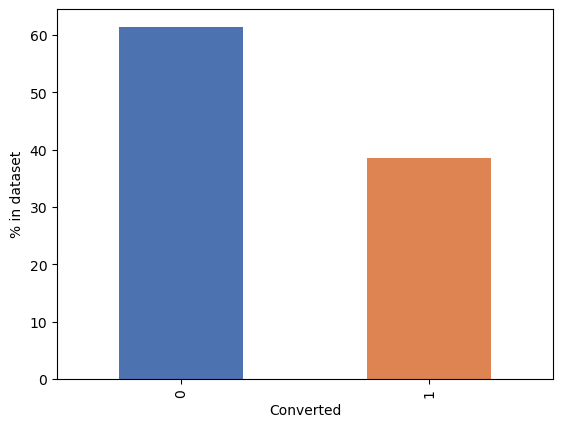

In [62]:
# For the target variable 'Converted'
percent_plot('Converted')
     

In [63]:
(sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100

38.53896103896104

In [64]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

38.53896103896104

### Visualising Numerical Variables and Outlier Treatment

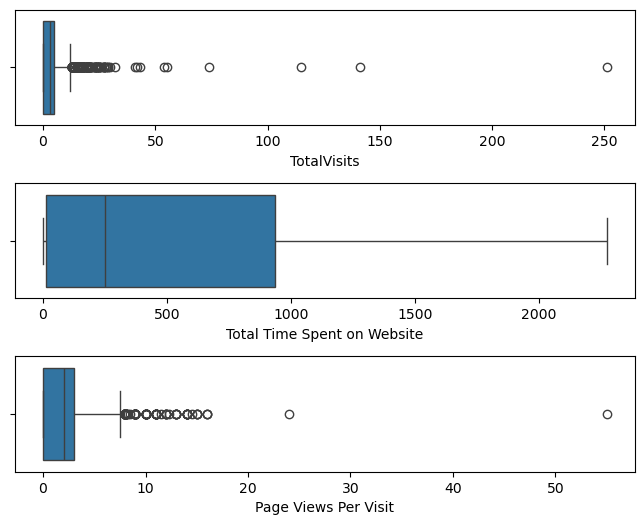

In [66]:
# Boxplots
numeric_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(8, 6))
for var in numeric_var:
    plt.subplot(3,1,numeric_var.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [67]:
lead_df[numeric_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787
std,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000


#### Insight:
From the boxplots, we can see that there are outliers present in the variables.

1. For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
2. There are no significant outliers in 'Total Time Spent on Website'
3. For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

<!-- From the boxplots, we can see that there are outliers present in the variables.

1. For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
2. There are no significant outliers in 'Total Time Spent on Website'
3. For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value. -->

In [70]:
 # Outlier treatment
percentile = lead_df['TotalVisits'].quantile([0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentile[0]] = percentile[0]

In [71]:
percentile = lead_df['Page Views Per Visit'].quantile([0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentile[0]] = percentile[0]

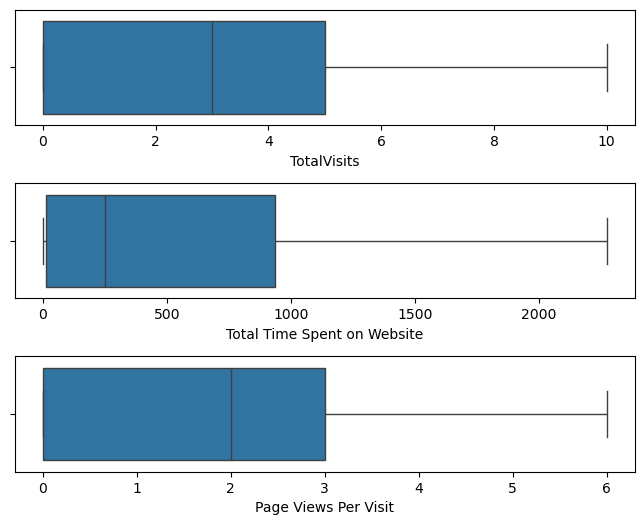

In [72]:
# Plot Boxplots to verify 
plt.figure(figsize=(8, 6))
for var in numeric_var:
    plt.subplot(3,1,numeric_var.index(var)+1)
    sns.boxplot(data=lead_df, x=var)
    plt.subplots_adjust(hspace=0.5)
plt.show()

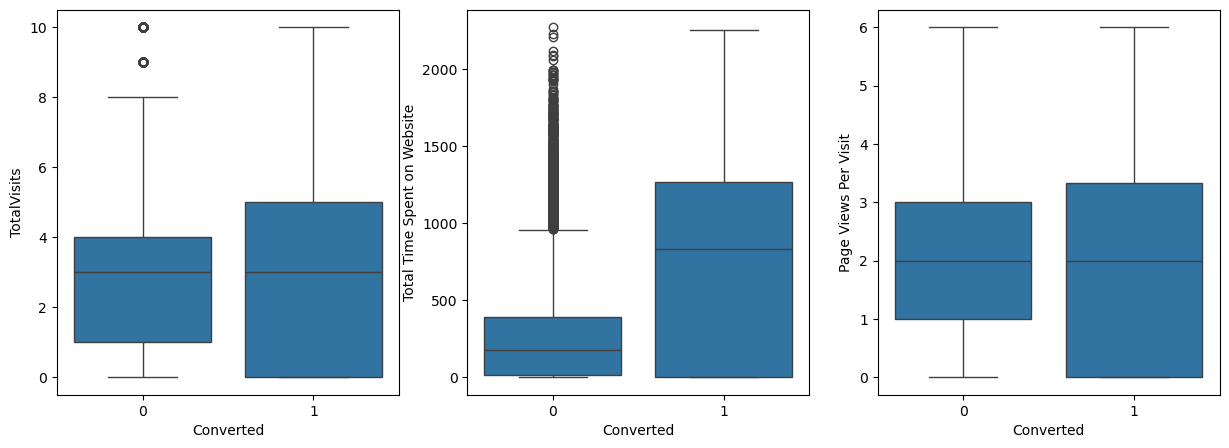

In [73]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in numeric_var:
    plt.subplot(1,3,numeric_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = lead_df)
plt.show()


#### Insight:
Leads spending more time on the weblise are more likely to be converted.
Website should be made more engaging to make leads spend more time.

### Visualising Categorical Variables

In [76]:
# Categorical variables
categorical_var = list(lead_df.columns[lead_df.dtypes == 'object'])
categorical_var 

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Univariate analysis (Categorical variable)

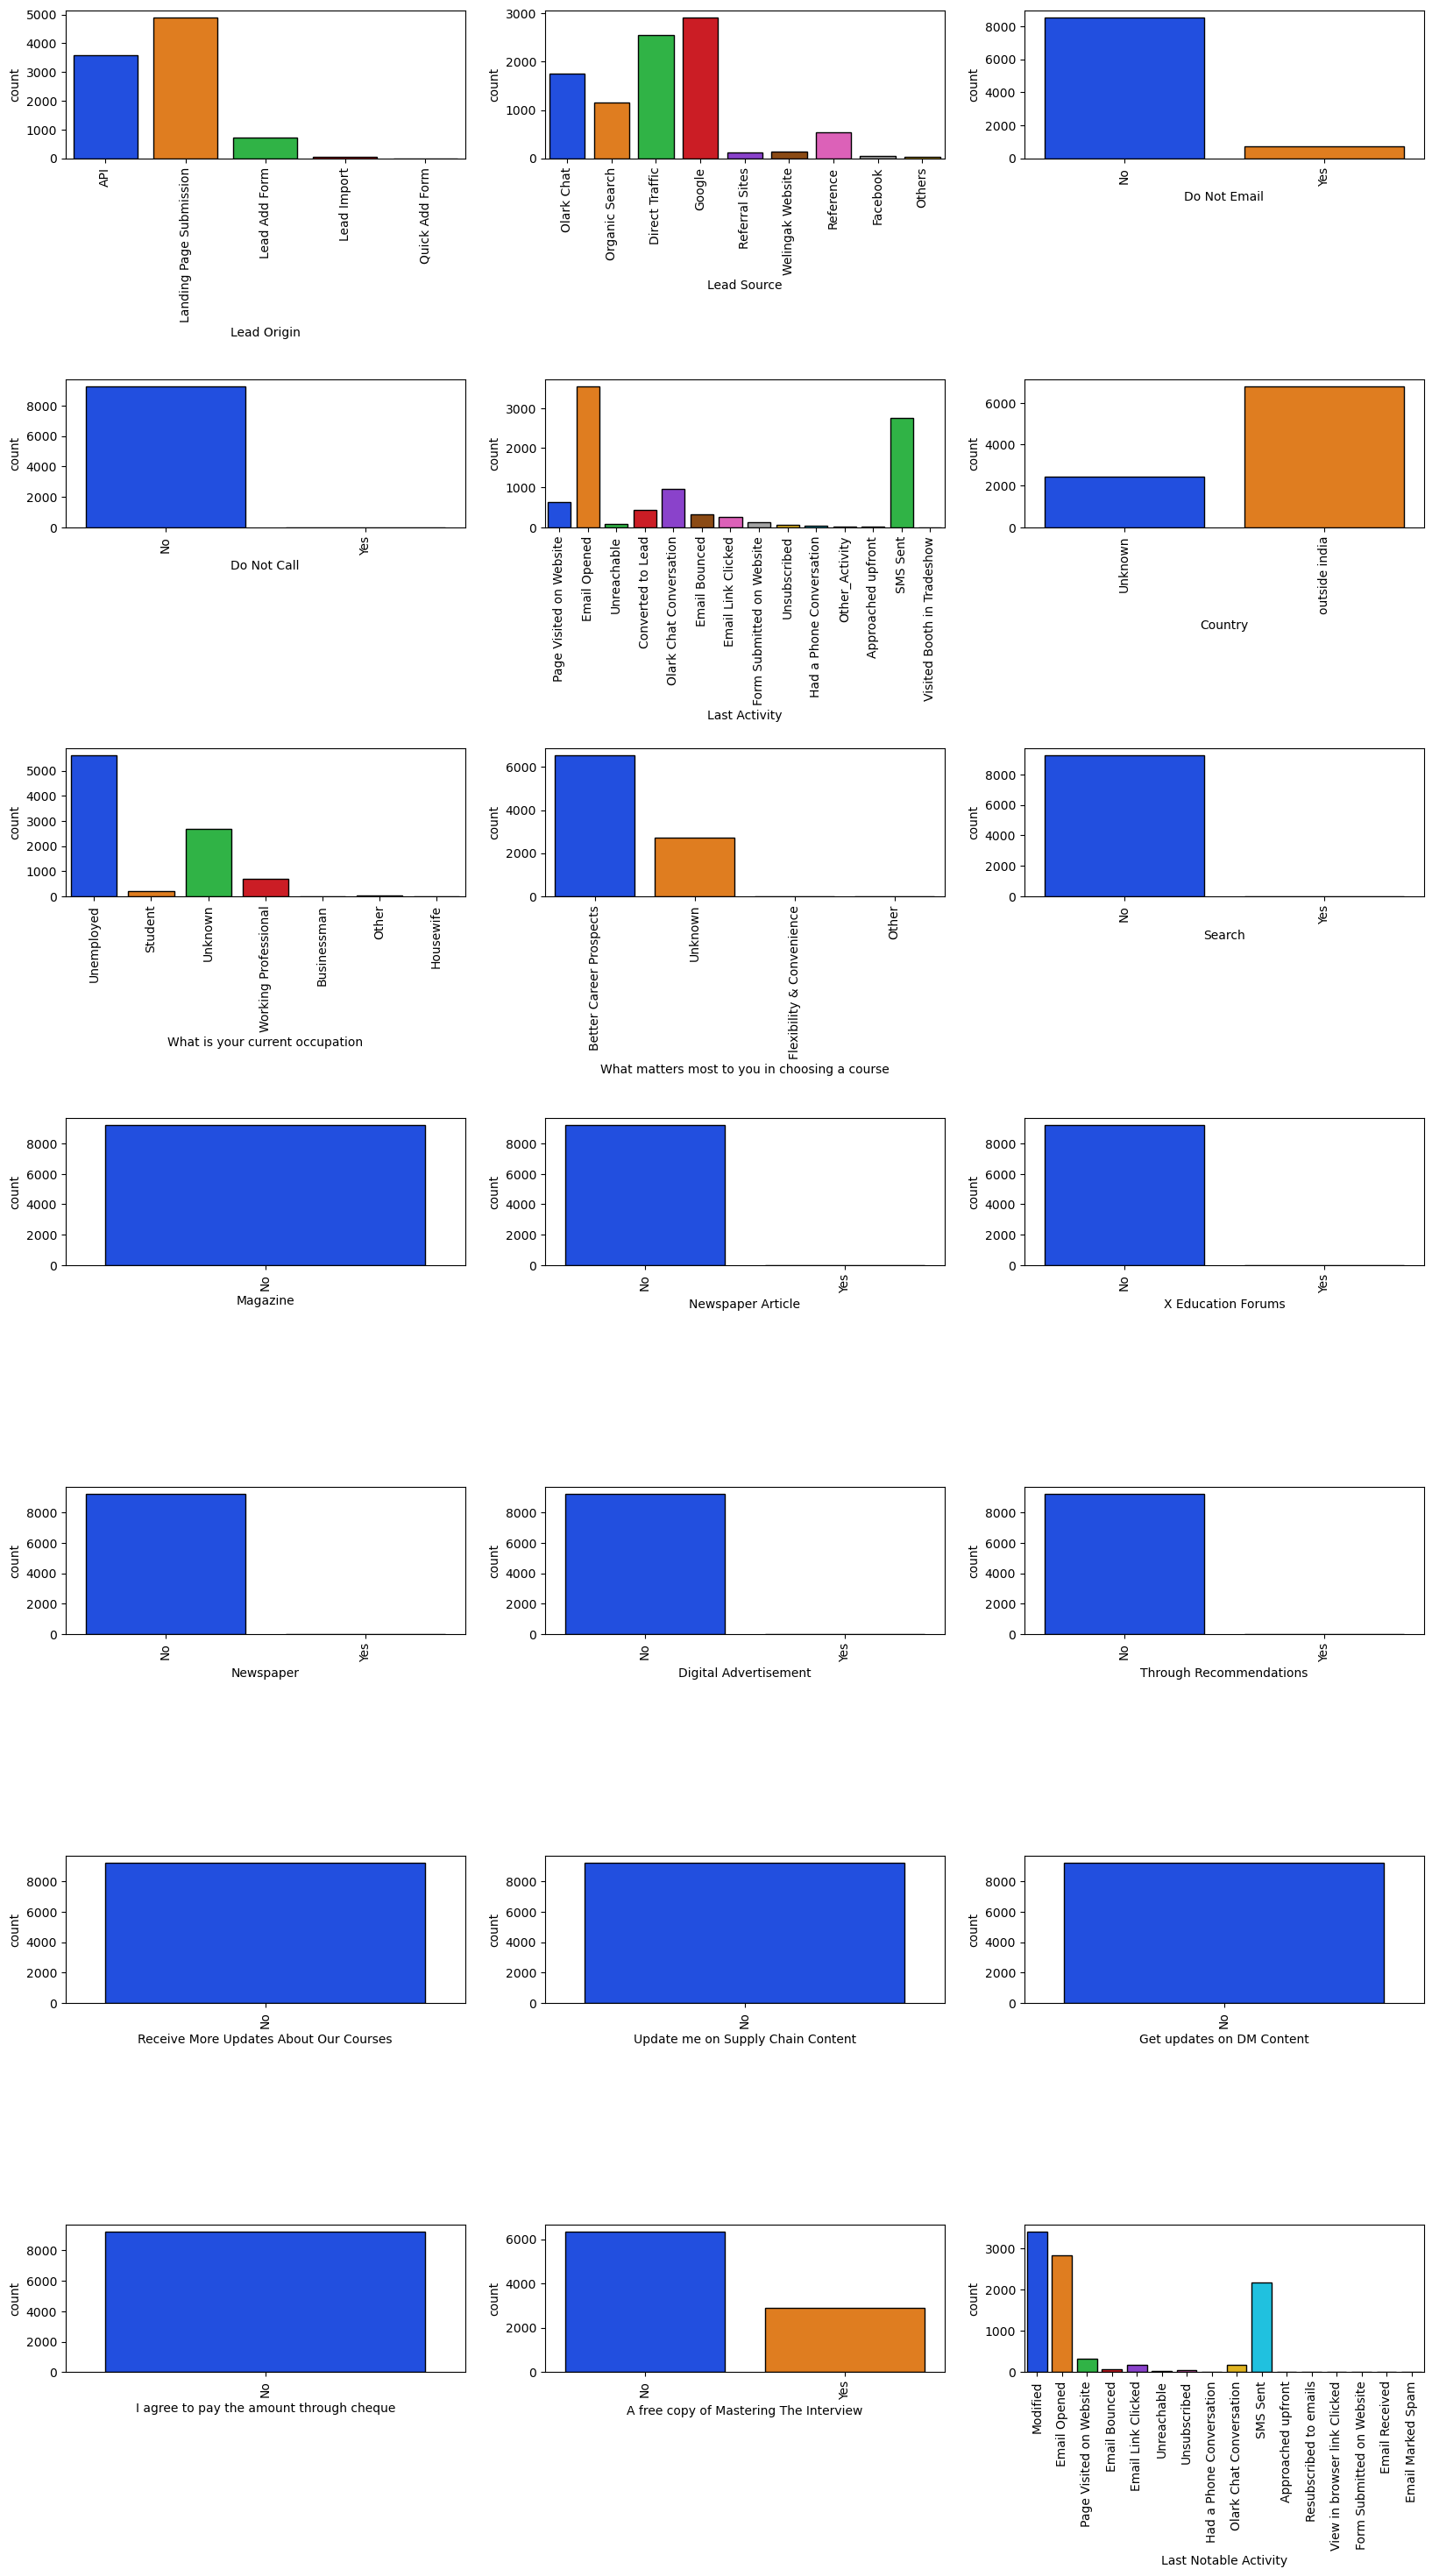

In [78]:
plt.figure(figsize=(20,35))

for i in enumerate([feature for feature in categorical_var]):
    plt.subplot(7, 3, i[0]+1)
    sns.countplot(data= lead_df, x=i[1],palette='bright',edgecolor='black')
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=1.5)

### Insights:
1. We can observe that many of columns mostly have one value('No') .So we can drop those columns as no inference can be drawn from those columns
2. To draw more inference,moving further for bivariate analysis.

### Bivariate analysis (Categorical variable with converted)

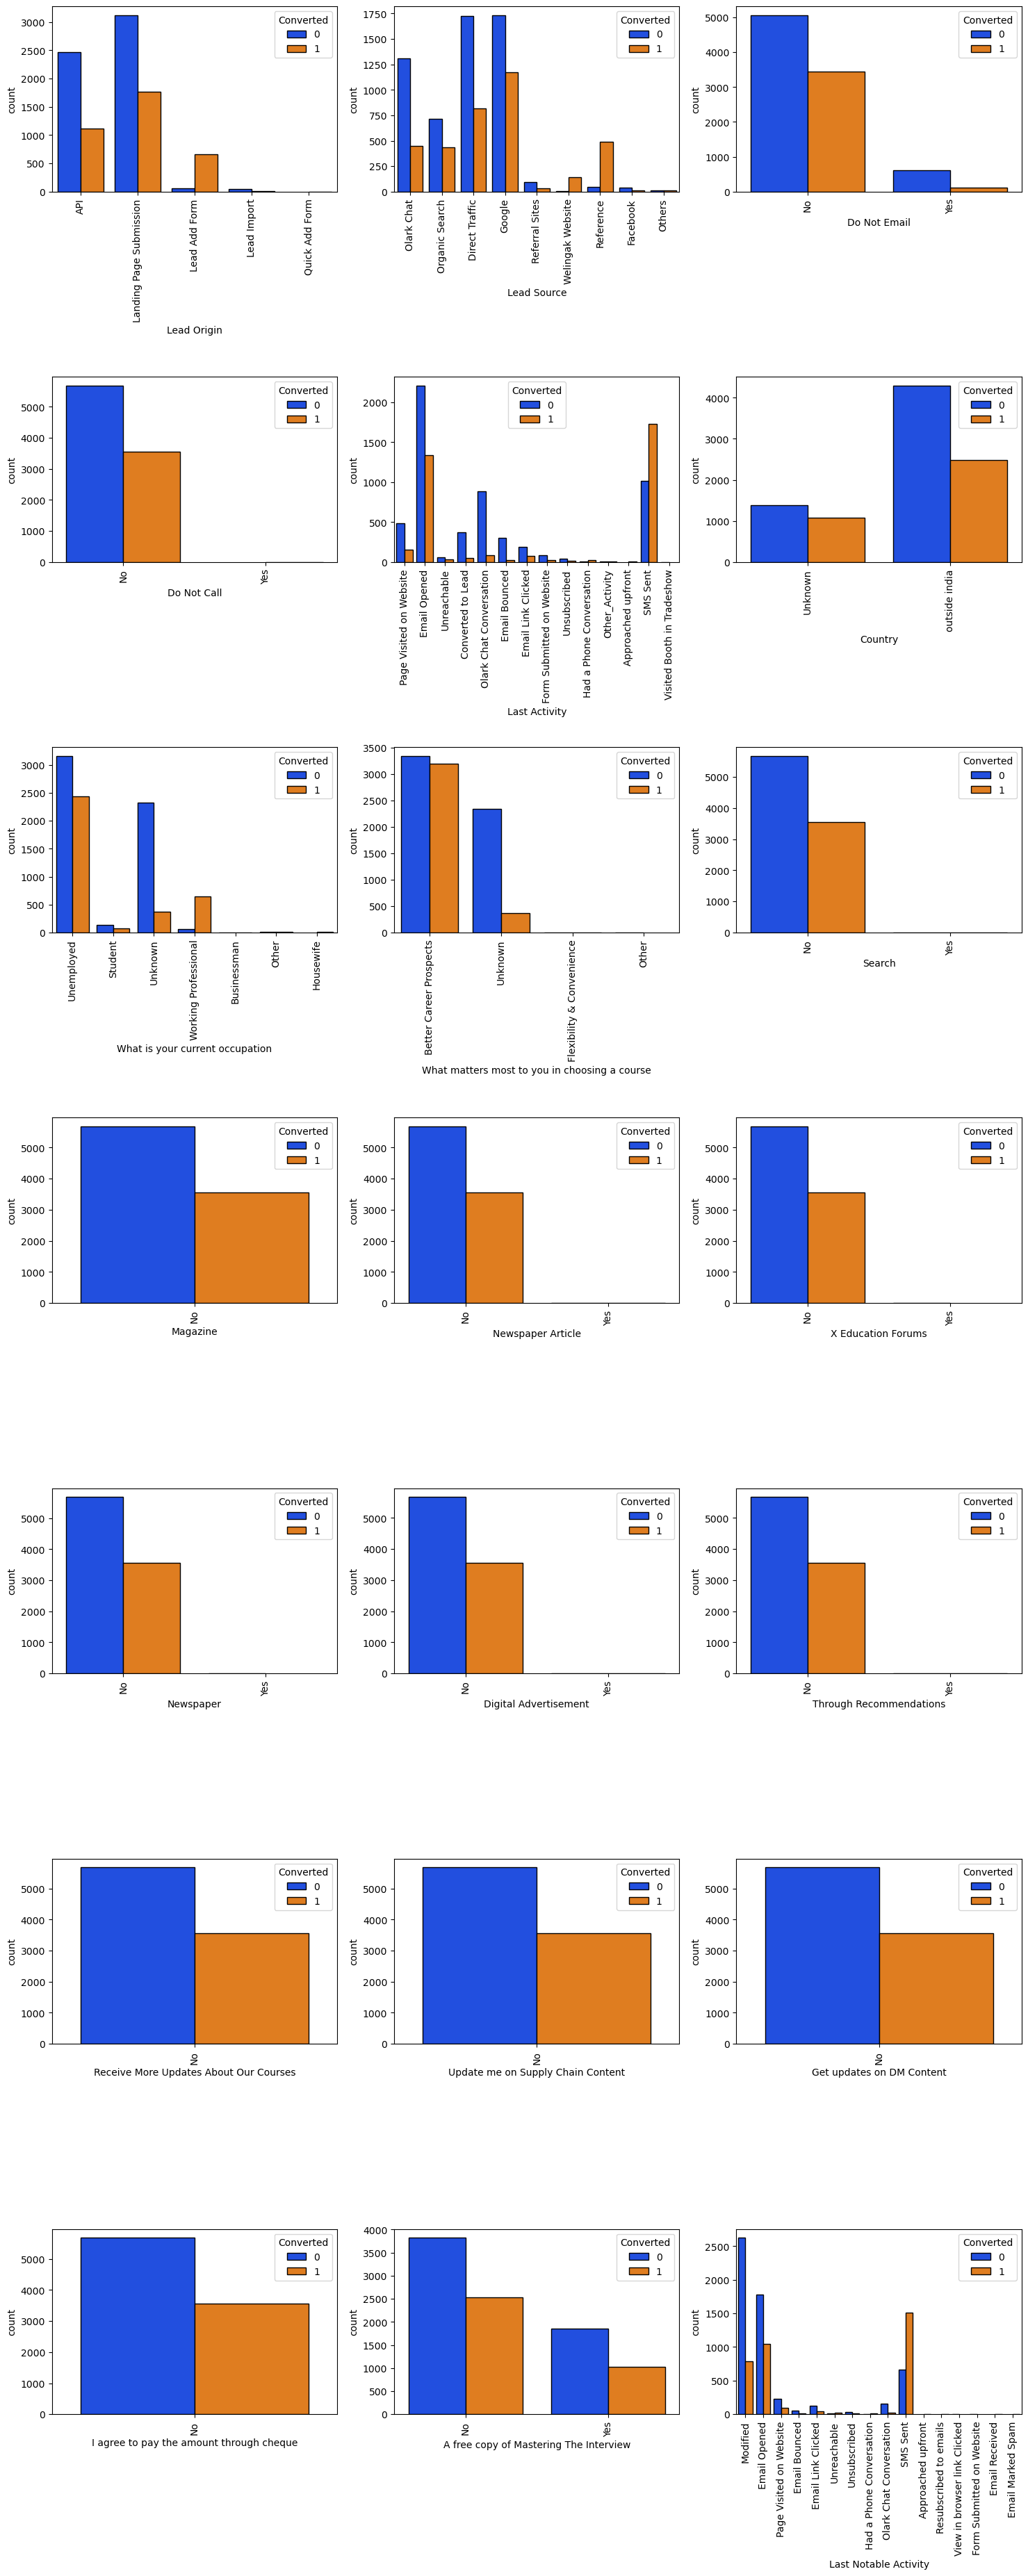

In [81]:
plt.figure(figsize=(18, 45))

for i in enumerate([feature for feature in categorical_var]):
    plt.subplot(7, 3, i[0] + 1)
    sns.countplot(data=lead_df, x=i[1], hue='Converted', palette='bright', edgecolor='black')
    plt.xticks(rotation=90)

plt.subplots_adjust(hspace=1.0)


### Insights:
1. The conversion rates for API and Landing Page Submission are between 30-35%, but the number of leads generated from these sources is significant. 
2. The Lead Add Form, on the other hand, has a conversion rate of over 90%, though the number of leads generated from it is relatively low. 
3. The Lead Import category generates very few leads.
4. Google and Direct traffic channels contribute the highest number of leads. However, the conversion rate is higher for reference leads and leads 
   generated through the Welingak website.
5. for most of the lead ,Email Opened is the last activity.
6. The conversion rate is high for leads with last activity as SMS Sent.
7. The highest conversion rate is for 'Working Professional'. 
8. High number of leads are generated for 'Unemployed' but conversion rate is low.
9. 'Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education  Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
 'Get updates on DM Content','I agree to pay the amount through cheque' most entries in these columns are 'No'.So No Inference can be drawn from these features.
10. So we can drop above mentioned columns for which we are not getting any inference .these are not useful for analysis.

### Based on the data visualization, dropping the variables which are not significant for analysis and will not any information to the model.

In [84]:
lead_df = lead_df.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine',
                        'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
#'A free copy of Mastering The Interview'

In [85]:
lead_df.shape

(9240, 11)

In [86]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [87]:
lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.134740,487.698268,2.225451
std,0.486714,2.787787,548.021466,1.800023
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,10.000000,2272.000000,6.000000


In [88]:
# find numeric variables
lead_df_num = lead_df.select_dtypes(include=['float64','int64'])
lead_df_num.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0


In [89]:
# Correlation matrix
cor = lead_df_num.corr()
cor

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.033838,0.362483,-0.016891
TotalVisits,0.033838,1.000000,0.342081,0.772377
Total Time Spent on Website,0.362483,0.342081,1.000000,0.343628
Page Views Per Visit,-0.016891,0.772377,0.343628,1.000000


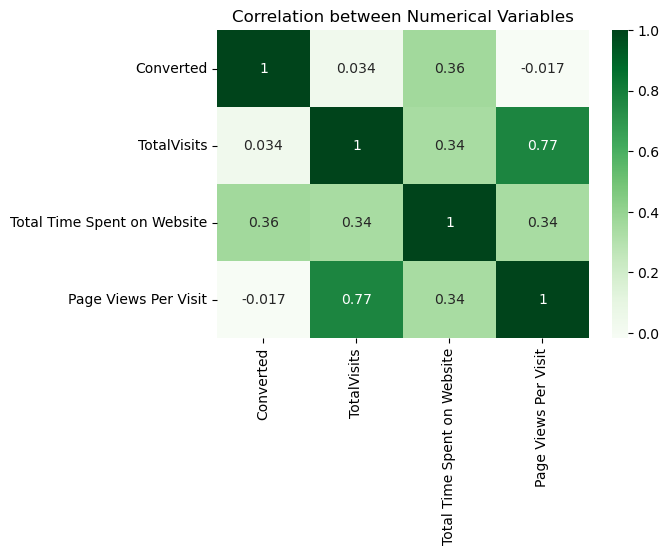

In [90]:
# Checking correlation between numeric vaiables
plt.figure(figsize=(6, 4)) 
sns.heatmap(cor, annot = True, cmap="Greens")
plt.title("Correlation between Numerical Variables")
plt.show()

### Insight:

1. The heatmap shows correlation between TotalVisits and Page Views Per Visit.
2. We will further investigate multicollinearity using VIF. 
3. If the VIF of a feature is greater than 5, we will drop one of the correlated features to reduce multicollinearity.

## Step 4: Data Preparation

#### Converting binary variable (Yes/No) to 0/1:

In [94]:
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({'Yes': 1, 'No': 0})

### Creating dummy variable for categorical column:

In [96]:
categorical_var = list(lead_df.columns[lead_df.dtypes == 'object'])
categorical_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [97]:
# Creating dummy variables and drop first ones
lead_df_dummies = pd.get_dummies(lead_df[categorical_var], drop_first=True).astype(int)

In [98]:
# Concatenating the dummy_data to the lead_data dataframe
lead_df = pd.concat([lead_df, lead_df_dummies], axis=1)

In [99]:
# Dropping the original variables
lead_df = lead_df.drop(categorical_var,axis=1)

In [100]:
pd.set_option("display.max_columns",200)
# pd.set_option("display.max_rows",200)

In [101]:
lead_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
lead_df.shape

(9240, 52)

In [103]:
# Find columns that end with '_unknown'
unknown_columns = [col for col in lead_df.columns if col.endswith('_Unknown')]
# Display the list of columns that end with '_unknown'
print(unknown_columns)

['What is your current occupation_Unknown']


In [104]:
# Dropping the Unknown variables
lead_df = lead_df.drop(unknown_columns,axis=1)

In [105]:
lead_df.shape

(9240, 51)

### Splitting the data into train and test set:

In [107]:
# Importing required package
from sklearn.model_selection import train_test_split

In [108]:
# Taking feature variable to X
X = lead_df.drop(['Converted'],axis=1)
y = lead_df['Converted']

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [111]:
# Importing required package
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
# Numerical variables
numeric_var    

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [114]:
X_train[numeric_var] = scaler.fit_transform(X_train[numeric_var])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.4,0.214349,0.221667,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.5,0.046655,0.416667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.5,0.541373,0.833333,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [115]:
X_train.shape

(6468, 50)

In [116]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,0.078386,0.312693,0.212974,0.369153,0.528139,0.079468,0.005102,0.000155,0.005102,0.320810,0.190167,0.121058,0.002783,0.060297,0.014224,0.014069,0.046073,0.036333,0.028293,0.381262,0.012678,0.003401,0.102195,0.001391,0.072047,0.300402,0.008813,0.006030,0.000155,0.001391,0.001237,0.021027,0.605133,0.077613,0.311843,0.006184,0.018398,0.000155,0.305349,0.000155,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,0.268799,0.278726,0.240566,0.299005,0.499246,0.270489,0.071252,0.012434,0.071252,0.466824,0.392463,0.326219,0.052684,0.238054,0.118422,0.117786,0.209659,0.187131,0.165822,0.485734,0.111888,0.058226,0.302929,0.037279,0.258586,0.458468,0.093468,0.077423,0.012434,0.037279,0.035150,0.143484,0.488860,0.267582,0.463282,0.078403,0.134397,0.012434,0.460591,0.012434,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.005282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

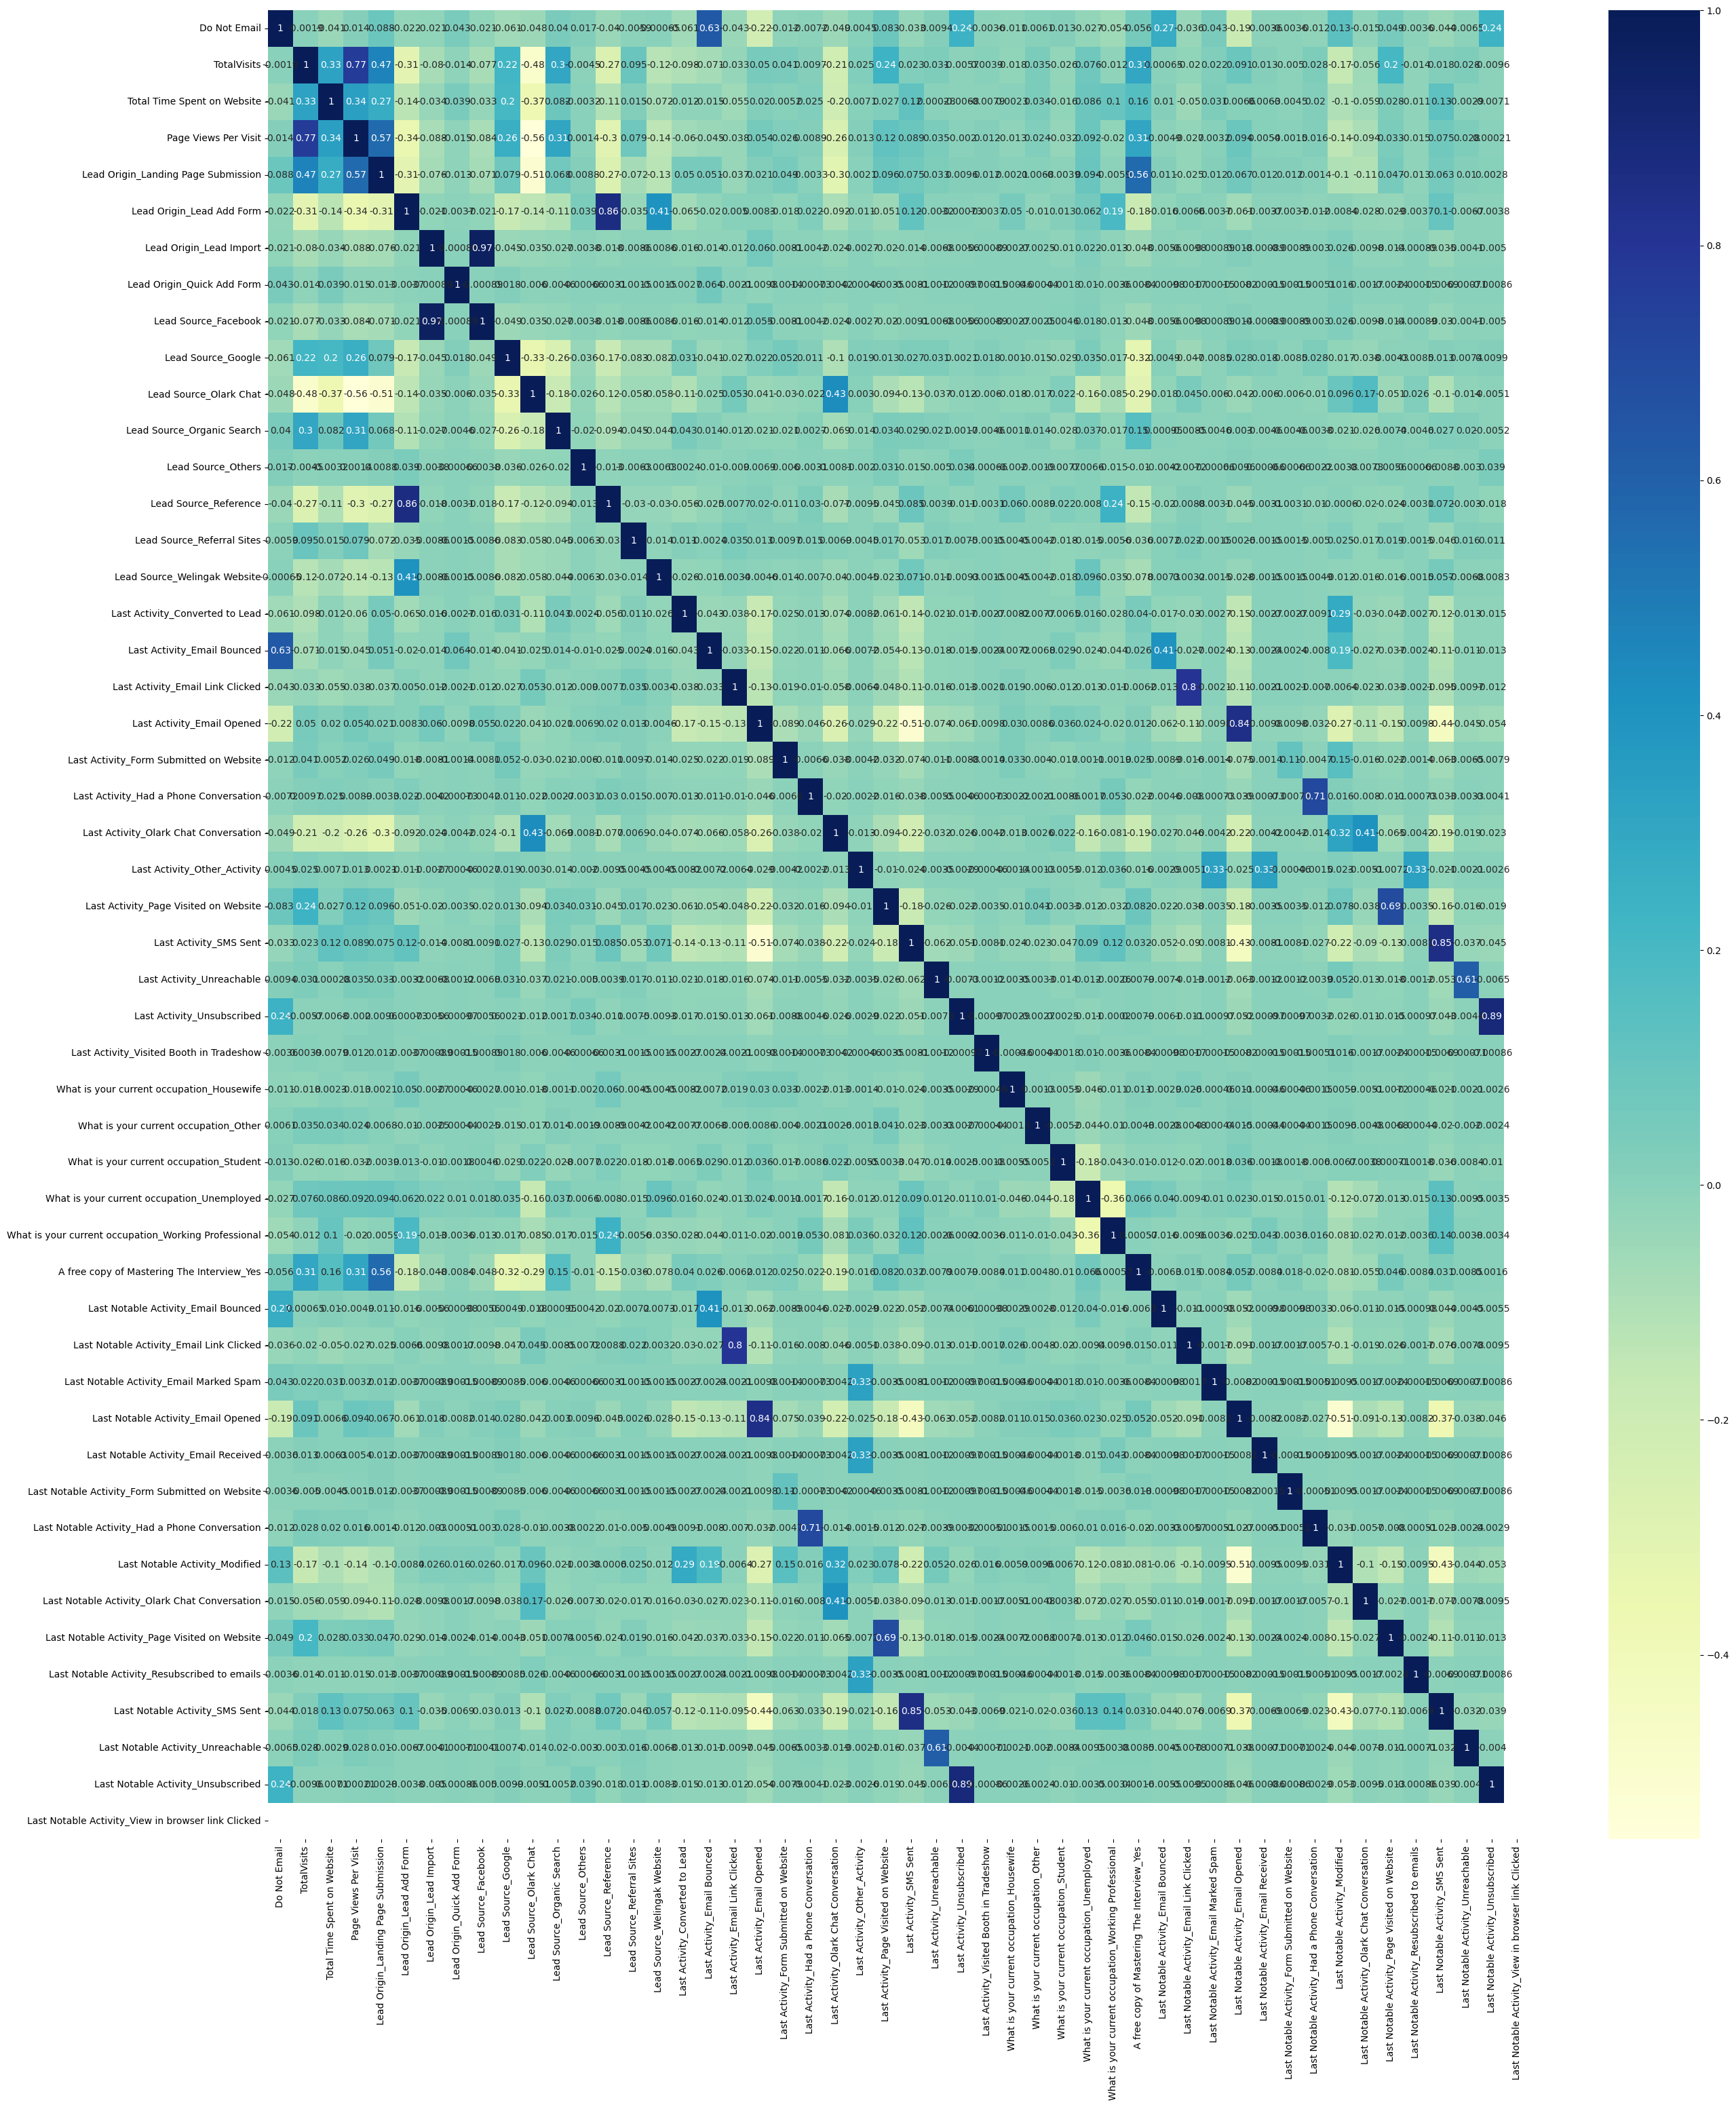

In [117]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 35))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Model Building

### Feature Selection Using RFE

In [120]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [121]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [122]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 13),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 5),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Clicked', False, 16),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_O

In [123]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [124]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Other_Activity', 'Last Activity_Page Visited on Website',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
      

### Model Building

#### Assessing the model with StatsModels

#### Model 1

In [128]:
import statsmodels.api as sm

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.1
Date:                Tue, 21 Jan 2025   Deviance:                       5296.2
Time:                        11:53:47   Pearson chi2:                 6.97e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6930      0.124    -29.764      0.000      -3.936      -3.450
Do Not Email                                            -1.3501      0.165     -8.199      0.000      -1.673      -1.027
TotalVisits                                              0.8522      0.154      5.551      0.000       0.551       1.153
Total Time Spent on Website                              4.4889      0.165     27.257      0.000       4.166       4.812
Lead Origin_Lead Add Form                                3.7451      0.199     18.810      0.000       3.355       4.135
Lead Source_Olark Chat                                   1.6724      0.121     13.826      0.000       1.435       1.909
Lead Source_Welingak Website                             1.9635      0.743      2.643      0.008       0.507       3.420
Last Activity_Had a Phone Conversation                   0.6143      0.958      0.641      0.521      -1.263       2.492
Last Activity_Olark Chat Conversation                   -1.1590      0.167     -6.935      0.000      -1.487      -0.831
Last Activity_SMS Sent                                   1.3069      0.074     17.669      0.000       1.162       1.452
What is your current occupation_Housewife               24.0615   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
What is your current occupation_Student                  1.2560      0.238      5.275      0.000       0.789       1.723
What is your current occupation_Unemployed               1.1437      0.086     13.258      0.000       0.975       1.313
What is your current occupation_Working Professional     3.6737      0.197     18.622      0.000       3.287       4.060
Last Notable Activity_Had a Phone Conversation           2.9756      1.479      2.012      0.044       0.077       5.875
Last Notable Activity_Unreachable                        2.0199      0.532      3.796      0.000       0.977       3.063
========================================================================================================================
"""

#### Insight:
Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

#### Checking VIF

In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.52
1,TotalVisits,2.41
2,Total Time Spent on Website,2.07
6,Last Activity_Had a Phone Conversation,2.02
13,Last Notable Activity_Had a Phone Conversation,2.01
3,Lead Origin_Lead Add Form,1.57
4,Lead Source_Olark Chat,1.54
8,Last Activity_SMS Sent,1.51
7,Last Activity_Olark Chat Conversation,1.39
12,What is your current occupation_Working Profes...,1.36


In [133]:
# Dropping the column 'What is your current occupation_Housewife' as it's p-value is high.
col1 = col.drop('What is your current occupation_Housewife')

#### Model 2

In [135]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.5
Date:                Tue, 21 Jan 2025   Deviance:                       5321.0
Time:                        11:53:47   Pearson chi2:                 7.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6442      0.123    -29.672      0.000      -3.885      -3.404
Do Not Email                                            -1.3595      0.165     -8.257      0.000      -1.682      -1.037
TotalVisits                                              0.8376      0.153      5.469      0.000       0.537       1.138
Total Time Spent on Website                              4.4820      0.164     27.285      0.000       4.160       4.804
Lead Origin_Lead Add Form                                3.7862      0.199     19.029      0.000       3.396       4.176
Lead Source_Olark Chat                                   1.6543      0.121     13.722      0.000       1.418       1.891
Lead Source_Welingak Website                             1.9160      0.743      2.579      0.010       0.460       3.372
Last Activity_Had a Phone Conversation                   0.5962      0.958      0.622      0.534      -1.281       2.474
Last Activity_Olark Chat Conversation                   -1.1694      0.167     -7.005      0.000      -1.497      -0.842
Last Activity_SMS Sent                                   1.2943      0.074     17.539      0.000       1.150       1.439
What is your current occupation_Student                  1.2180      0.238      5.119      0.000       0.752       1.684
What is your current occupation_Unemployed               1.1082      0.085     12.989      0.000       0.941       1.275
What is your current occupation_Working Professional     3.6358      0.197     18.475      0.000       3.250       4.022
Last Notable Activity_Had a Phone Conversation           2.9781      1.477      2.016      0.044       0.083       5.874
Last Notable Activity_Unreachable                        2.0007      0.531      3.767      0.000       0.960       3.042
========================================================================================================================
"""

#### Insight:
Since Pvalue of 'Last Activity_Had a Phone Conversation' is very high, we can drop this column.

#### Checking VIF

In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.51
1,TotalVisits,2.40
2,Total Time Spent on Website,2.06
6,Last Activity_Had a Phone Conversation,2.02
12,Last Notable Activity_Had a Phone Conversation,2.01
3,Lead Origin_Lead Add Form,1.56
4,Lead Source_Olark Chat,1.54
8,Last Activity_SMS Sent,1.51
7,Last Activity_Olark Chat Conversation,1.39
11,What is your current occupation_Working Profes...,1.36


In [139]:
# Dropping the column 'Last Activity_Had a Phone Conversation' as it has high p-value
col1 = col1.drop('Last Activity_Had a Phone Conversation')

#### Model 3

In [141]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2660.7
Date:                Tue, 21 Jan 2025   Deviance:                       5321.4
Time:                        11:53:47   Pearson chi2:                 6.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6431      0.123    -29.669      0.000      -3.884      -3.402
Do Not Email                                            -1.3600      0.165     -8.258      0.000      -1.683      -1.037
TotalVisits                                              0.8366      0.153      5.463      0.000       0.536       1.137
Total Time Spent on Website                              4.4841      0.164     27.302      0.000       4.162       4.806
Lead Origin_Lead Add Form                                3.7886      0.199     19.045      0.000       3.399       4.179
Lead Source_Olark Chat                                   1.6537      0.121     13.718      0.000       1.417       1.890
Lead Source_Welingak Website                             1.9130      0.743      2.575      0.010       0.457       3.369
Last Activity_Olark Chat Conversation                   -1.1704      0.167     -7.011      0.000      -1.498      -0.843
Last Activity_SMS Sent                                   1.2930      0.074     17.528      0.000       1.148       1.438
What is your current occupation_Student                  1.2170      0.238      5.114      0.000       0.751       1.683
What is your current occupation_Unemployed               1.1081      0.085     12.988      0.000       0.941       1.275
What is your current occupation_Working Professional     3.6383      0.197     18.494      0.000       3.253       4.024
Last Notable Activity_Had a Phone Conversation           3.5734      1.126      3.174      0.002       1.367       5.780
Last Notable Activity_Unreachable                        1.9997      0.531      3.765      0.000       0.959       3.041
========================================================================================================================
"""

We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

#### Checking VIF

In [144]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.51
1,TotalVisits,2.40
2,Total Time Spent on Website,2.06
3,Lead Origin_Lead Add Form,1.56
4,Lead Source_Olark Chat,1.54
7,Last Activity_SMS Sent,1.51
6,Last Activity_Olark Chat Conversation,1.39
10,What is your current occupation_Working Profes...,1.36
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.06


### Insight:
Since the P-values of all variables are near 0 and VIF values are also within range for all the variables.Now We have 13 variables in our final 
model.

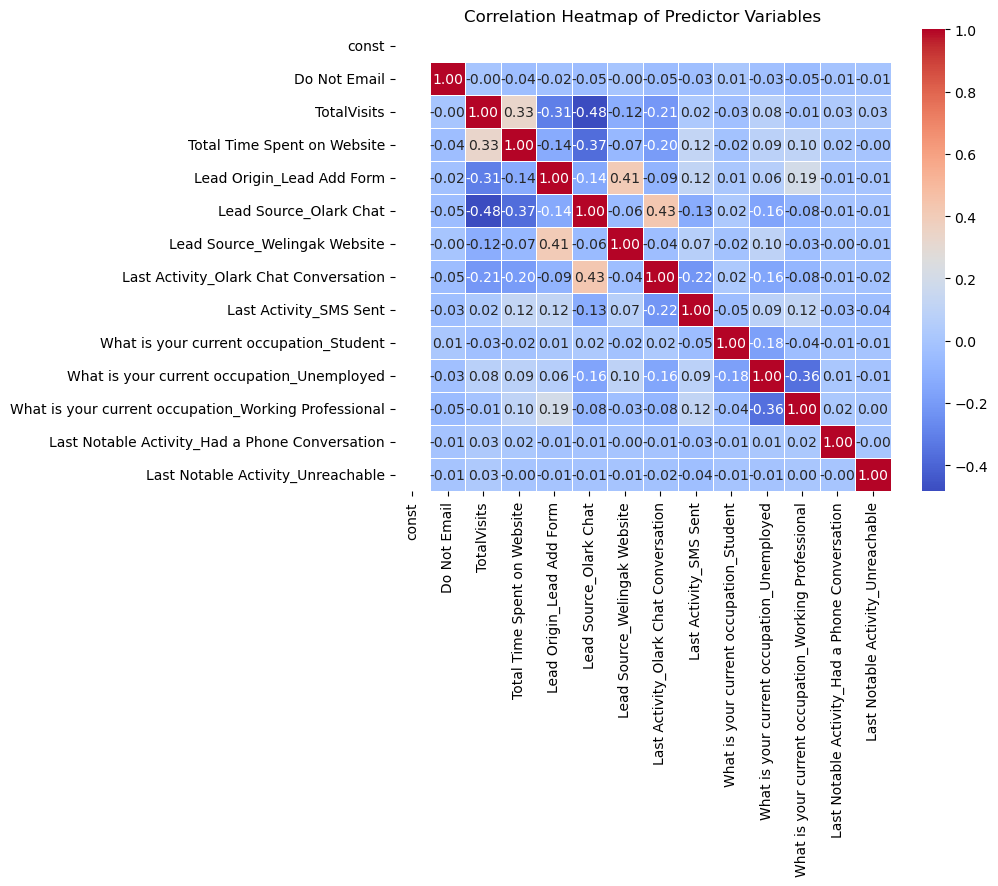

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_train_sm is a pandas DataFrame, compute the correlation matrix
corr_matrix = X_train_sm.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Predictor Variables")
plt.show()


#### Insight:
We can see from the above heatmap,there is no such multicollinearity exist so we can proceed with these features.

### Making Prediction on the Train set

In [149]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.292928
6795    0.224592
3516    0.436917
8105    0.832576
3934    0.292928
4844    0.989923
3297    0.144117
8071    0.988535
987     0.124456
7423    0.890307
dtype: float64

In [150]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29292796, 0.22459209, 0.43691664, 0.83257613, 0.29292796,
       0.98992282, 0.14411679, 0.98853515, 0.1244564 , 0.89030749])

In [151]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.292928
1,0,0.224592
2,0,0.436917
3,0,0.832576
4,0,0.292928


In [152]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.292928,0
1,0,0.224592,0
2,0,0.436917,0
3,0,0.832576,1
4,0,0.292928,0


## Step 6: Model Evaluation

In [154]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [155]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

In [156]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3540,  462],
       [ 748, 1718]], dtype=int64)

In [157]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8129251700680272

In [158]:
other_metrics(confusion)

Sensitivity:  0.6966747769667477
Specificity:  0.8845577211394303
False postive rate:  0.11544227886056972
Positive predictive value:  0.7880733944954128
Negative predictive value:  0.8255597014925373


### Insight:
With the current cut off as 0.5 we have around 81.33 % accuracy, sensitivity of around 69.7% and specificity of around 88.50 %.for this model sensitivity is not upto mark.

### ROC Curve (Optimise Cut off )

The previous cut off was randomely selected. Now to find the optimum one

In [162]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

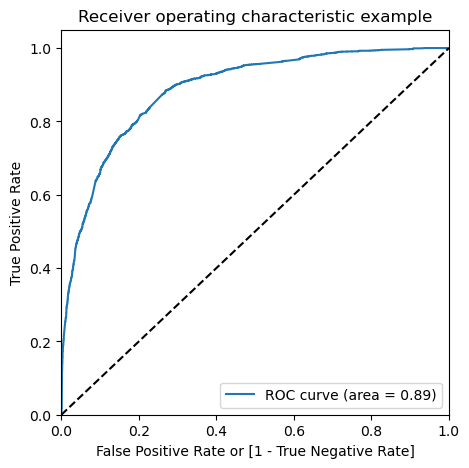

In [164]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under ROC curve is 0.89 which is a very good value.

In [166]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.292928,0,1,1,1,0,0,0,0,0,0,0
1,0,0.224592,0,1,1,1,0,0,0,0,0,0,0
2,0,0.436917,0,1,1,1,1,1,0,0,0,0,0
3,0,0.832576,1,1,1,1,1,1,1,1,1,1,0
4,0,0.292928,0,1,1,1,0,0,0,0,0,0,0


In [167]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.588281,0.979724,0.347076
0.2,0.2,0.760359,0.913625,0.665917
0.3,0.3,0.797464,0.834550,0.774613
0.4,0.4,0.812616,0.763179,0.843078
0.5,0.5,0.812925,0.696675,0.884558
0.6,0.6,0.805504,0.631792,0.912544
0.7,0.7,0.782004,0.516626,0.945527
0.8,0.8,0.751855,0.397810,0.970015
0.9,0.9,0.717842,0.280616,0.987256


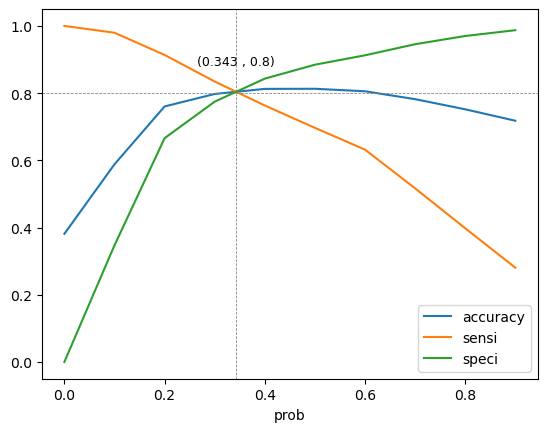

In [168]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

#### From the graph it is visible that the optimal cut off is at 0.33.

In [170]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.292928,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.224592,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.436917,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.832576,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.292928,0,1,1,1,0,0,0,0,0,0,0,0


In [171]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8036487322201608

In [172]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3231,  771],
       [ 499, 1967]], dtype=int64)

In [173]:
other_metrics(confusion2)

Sensitivity:  0.7976480129764801
Specificity:  0.8073463268365817
False postive rate:  0.1926536731634183
Positive predictive value:  0.7184075967859752
Negative predictive value:  0.8662198391420911


#### Insight:
With the current threshold set at 0.34, the model achieves an accuracy of 80.36%, a sensitivity of 79.76%, and a specificity of 80.73%. This indicates 
a strong performance, with a good balance between correctly identifying positive cases (sensitivity) and correctly identifying negative cases 
(specificity). The overall accuracy suggests that the model is effectively distinguishing between the two classes.

### Calculate the Lead Score

In [176]:
y_train_pred_final['Lead Score']= y_train_pred_final['Conversion_Prob'].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.292928,0,1,1,1,0,0,0,0,0,0,0,0,29
1,0,0.224592,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.436917,0,1,1,1,1,1,0,0,0,0,0,1,44
3,0,0.832576,1,1,1,1,1,1,1,1,1,1,0,1,83
4,0,0.292928,0,1,1,1,0,0,0,0,0,0,0,0,29


#### Lead score provides insights into the likelihood of conversion, enabling the sales team to prioritize hot leads, focus on high-potential prospects, and optimize follow-up efforts for improved conversion rates.

## Step 7: Precision-Recall

In [179]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [180]:
# Precision = TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7184075967859752

In [181]:
#Recall = TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7976480129764801

## Precision and recall tradeoff

In [183]:
from sklearn.metrics import precision_recall_curve

In [184]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

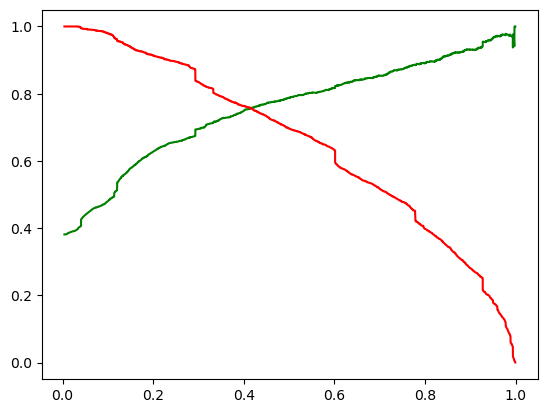

In [186]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### from the above graph ,we get optimal (threshold) value as 0.41 so checking metrics parameters again

In [188]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.292928,0,1,1,1,0,0,0,0,0,0,0,0,29
1,0,0.224592,0,1,1,1,0,0,0,0,0,0,0,0,22
2,0,0.436917,0,1,1,1,1,1,0,0,0,0,0,1,44
3,0,0.832576,1,1,1,1,1,1,1,1,1,1,0,1,83
4,0,0.292928,0,1,1,1,0,0,0,0,0,0,0,0,29


In [189]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8143166357452072

In [190]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3393,  609],
       [ 592, 1874]], dtype=int64)

In [191]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.7599351175993512
Specificity:  0.8478260869565217
False postive rate:  0.15217391304347827
Positive predictive value:  0.7547321788159485
Negative predictive value:  0.8514429109159347


### Insight:
With the threshold value set at 0.41, the model achieves 81.43% accuracy, 75.99% sensitivity, and 84.78% specificity.

In [193]:
# Substituting the value of true positive
TP = confusion3[1,1]
# Substituting the value of true negatives
TN = confusion3[0,0]
# Substituting the value of false positives
FP = confusion3[0,1] 
# Substituting the value of false negatives
FN = confusion3[1,0]

In [194]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7547321788159485

In [195]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7599351175993512

With the current cut off as 0.41 we have Precision around 75.47 % and Recall around 75.99 %.

#### Observation:
- With the threshold value set at 0.34, the model achieves an **accuracy** of 80.36%, a **sensitivity** of 79.76%, and a **specificity** of 80.73%.
- With the threshold value set at 0.41,the model achieves an **accuracy** of 81.43%, a **sensitivity** of 75.99%, and a **specificity** of 84.78%.
- At a threshold of 0.41, accuracy improves slightly (from ~80% to 81%).
- Sensitivity (True Positive Rate): **Threshold at 0.34** achieves a sensitivity of around 79.76%, meaning the model is correctly identifying around 80% of the positive cases (target events).**Threshold at 0.41** reduces sensitivity to 75.99%, meaning it misses more true positive cases, which could be detrimental for situations where identifying positive cases is crucial.
- Specificity (True Negative Rate): At a threshold of 0.41, specificity increases to 84.78%, which means the model is better at correctly identifying     negative cases. However, this comes at the cost of reduced sensitivity.
- **Goal Consideration(Higher Conversion Rate)**: Higher sensitivity is important if the goal is to capture as many positive instances as possible         (which seems to align with your focus on a higher conversion rate). Since **threshold 0.34** maintains a sensitivity of around 79.76% (higher than the 75.99 % at threshold 0.41), it appears to be a better choice for prioritizing the identification of positive cases.
  
#### Therefore, proceeding with **threshold = 0.34** to optimize for higher sensitivity and, consequently, higher conversion rates.


## Step 8: Prediction on Test set

In [199]:
X_test[numeric_var] = scaler.transform(X_test[numeric_var])

In [200]:
X_test.shape

(2772, 50)

In [201]:
# To get final features
X_test = X_test[col1]

In [202]:
# To add a constant
X_test_sm = sm.add_constant(X_test)

In [203]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.578012
1,1,0.927356
2,1,0.926204
3,0,0.113895
4,1,0.777946


In [204]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.578012,1
1,1,0.927356,1
2,1,0.926204,1
3,0,0.113895,0
4,1,0.777946,1
...,...,...,...
2767,0,0.096732,0
2768,1,0.927356,1
2769,0,0.292928,0
2770,0,0.171008,0


In [205]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8091630591630592

In [206]:
# Creating confusion matrix 
confusion_test = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_test

array([[1361,  316],
       [ 213,  882]], dtype=int64)

In [207]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8054794520547945
Specificity:  0.8115682766845558
False postive rate:  0.18843172331544425
Positive predictive value:  0.7362270450751253
Negative predictive value:  0.8646759847522236


In [208]:
# Substituting the value of true positive
TP = confusion_test[1,1]
# Substituting the value of true negatives
TN = confusion_test[0,0]
# Substituting the value of false positives
FP = confusion_test[0,1] 
# Substituting the value of false negatives
FN = confusion_test[1,0]

In [209]:
# Precision = TP / TP + FP
print(TP / (TP + FP))

0.7362270450751253


In [210]:
#Recall = TP / TP + FN
print(TP / (TP + FN))

0.8054794520547945


### Insight:
With the cutoff set at 0.35 on the test data, the model achieves an accuracy of 80.91%, a sensitivity of 80.54 %, and a specificity of 81.15%. This 
indicates that the model maintains a strong overall performance, with a good balance between correctly identifying positive cases (sensitivity) and 
correctly identifying negative cases (specificity).

### Calculate the Lead Score on test data

In [213]:
y_pred_final['Lead Score']= y_pred_final['Conversion_Prob'].map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead Score
0,1,0.578012,1,58
1,1,0.927356,1,93
2,1,0.926204,1,93
3,0,0.113895,0,11
4,1,0.777946,1,78


# Conclusion:

### Model Evaluation Summary:

#### Threshold at 0.34 (Train Data):
- **Accuracy**: 80.36%
- **Sensitivity**: 79.76%
- **Specificity**: 80.73%

#### Threshold at 0.34 (Test Data):
- **Accuracy**: 80.91%
- **Sensitivity**: 80.54%
- **Specificity**: 81.15%

With a threshold of 0.34, the model performs consistently across both train and test datasets:

- **Accuracy:** 80.36% (train), 80.91% (test) – The model generalizes well, with a slight improvement on test data.
- **Sensitivity:** 79.76% (train), 80.54% (test) – A small increase in sensitivity on the test set shows improved identification of positive cases.
- **Specificity:** 80.73% (train), 81.15% (test) – A slight increase in specificity indicates better identification of negative cases in the test set.

**Overall Insight:** The model demonstrates strong generalization, performing slightly better on unseen data. The threshold of 0.34 is optimal, balancing performance without overfiing.



### Top 3 features:
Based on the analysis of coefficient values, the top 3 features that have the most positive correlation with conversion rates are:

1. **Total Time Spent on Website (4.4841)**
2. **Lead Origin_Lead Add Form (3.7886)**
3. **What is your current occupation_Working Professional(3.6383)**

### Insights:

1. **Total Time Spent on Website (4.4841)**: The longer a visitor spends on the website, the higher the likelihood of conversion. This suggests that 
engagement and interest in the content or offerings of the website are key drivers of conversion. 

2. **Lead Origin_Lead Add Form (3.7886)**: Leads generated through the Lead Add Form are strongly correlated with conversions. This indicates that 
capturing lead information directly through a form is an effective method of generating valuable prospects.

3. **What is your current occupation_Working Professional(3.6383)**: Leads who are working professionals* are more likely to convert compared to other occupation categories. This group may value educational opportunities that enhance their careers.

### Other Notable Features:

**Other Notable Features:**

- **Phone Conversations (3.5734):** Leads who have had a phone conversation are more likely to convert. Follow up promptly and increase phone outreach.
- **Unreachable Leads (1.9997):** Even unreachable leads may convert with persistent multi-channel follow-up strategies like email, SMS, or social media.
- **Welingak Website (1.9130):** Leads from this source show high conversion potential, warranting prioritized outreach.
- **Olark Chat (1.6537):** Leads interacting through live chat are more engaged and more likely to convert; follow up promptly after chat interactions.
- **SMS Sent (1.2930):** SMS follow-ups are effective in boosting conversion rates; ensure quick follow-ups.
- **Students (1.2170):** Students are likely to convert, but tailored, affordable programs are needed.
- **Unemployed (1.1081):** Unemployed leads may seek career opportunities through education; offer flexible learning options.
- **Total Visits (0.8366):** More website visits indicate higher engagement and should be prioritized for re-engagement.
- **Do Not Email (-1.3600):** Leads marked "Do Not Email" are less likely to convert; use alternative outreach methods.
- **Olark Chat Conversations (-1.1704):** Chat interactions may need optimization to drive higher cosions.
     

By focusing on these key features and implementing targeted strategies, X Education can significantly increase the conversion rate and potentially 
reach the goal of 80% lead conversion, helping to identify and nurture **Hot Leads** effectively.